# TEAM 1
**1. Sai Sumana Adurugatla : 1002073766<br>
2. MIR MUSTAFA ALI : 1002117402<Br>
3. Kiran Mai Akaram : 1002115618**<br>

## Task 1: Logistic Regression on Breast Cancer Data


In [4]:
import pandas as pd

data = pd.read_csv('BreastCancer.csv')

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Task1A :
1. Is there any need to convert columns based on their Dtype? Check details about the data.

Ans: No  because as the data description mentions that all feature values are recorded with four significant digits and features are represented as numerical values (float).

2. Check if there are any missing values. Handle the missing values if any.

Ans: As mentioned in data description, there are no missing attribute values



In [5]:
# Display the data types of each column
print("Data Types:")
print(data.dtypes)

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Handle missing values
if missing_values.any():

    data = data.dropna() 
else:
    print("\nNo missing values found.")

Data Types:
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavit

### Task 1B:
First things first!
Before applying feature engineering or bringing the columns to appropriate form, split the data into training/testing.
Why? because by doing this we ensure that there is no data leakage.

1. Map the target variable.
2. Split the data into training/testing with 80-20 ratio.
3. Use stratify since to ensure equal percentage of class samples into both subsamples.

In [6]:

# Display column names to verify the correct target variable name
print("Column Names:")
print(data.columns)

Column Names:
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [7]:
from sklearn.model_selection import train_test_split

# 1. Map the target variable
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Separate features (X) and target variable (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# 2. Split the data into training/testing with 80-20 ratio using stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Display the shapes of the resulting datasets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (455, 31)
Testing data shape: (114, 31)


* mapping the target variable as diagnosis and splitting the data into training and testing data into 80:20 ratio using stratify


### Task 1C:
Let's look at mutlicollinearity of the data

1. Plot correlation table for all the number varaibles.
2. Create a list of variables that produces multicollinearity and drop them
3. Plot correlation table for the new set(remaining) of variables.
4. drop the columns for test data as well.

Hint: For detecting multicollinearity variables, look at the diagonal line in the matrix and remove one of the two variables that shows extreme collinearity.




used pearson correlation method to remove columns which have multi co-linearity


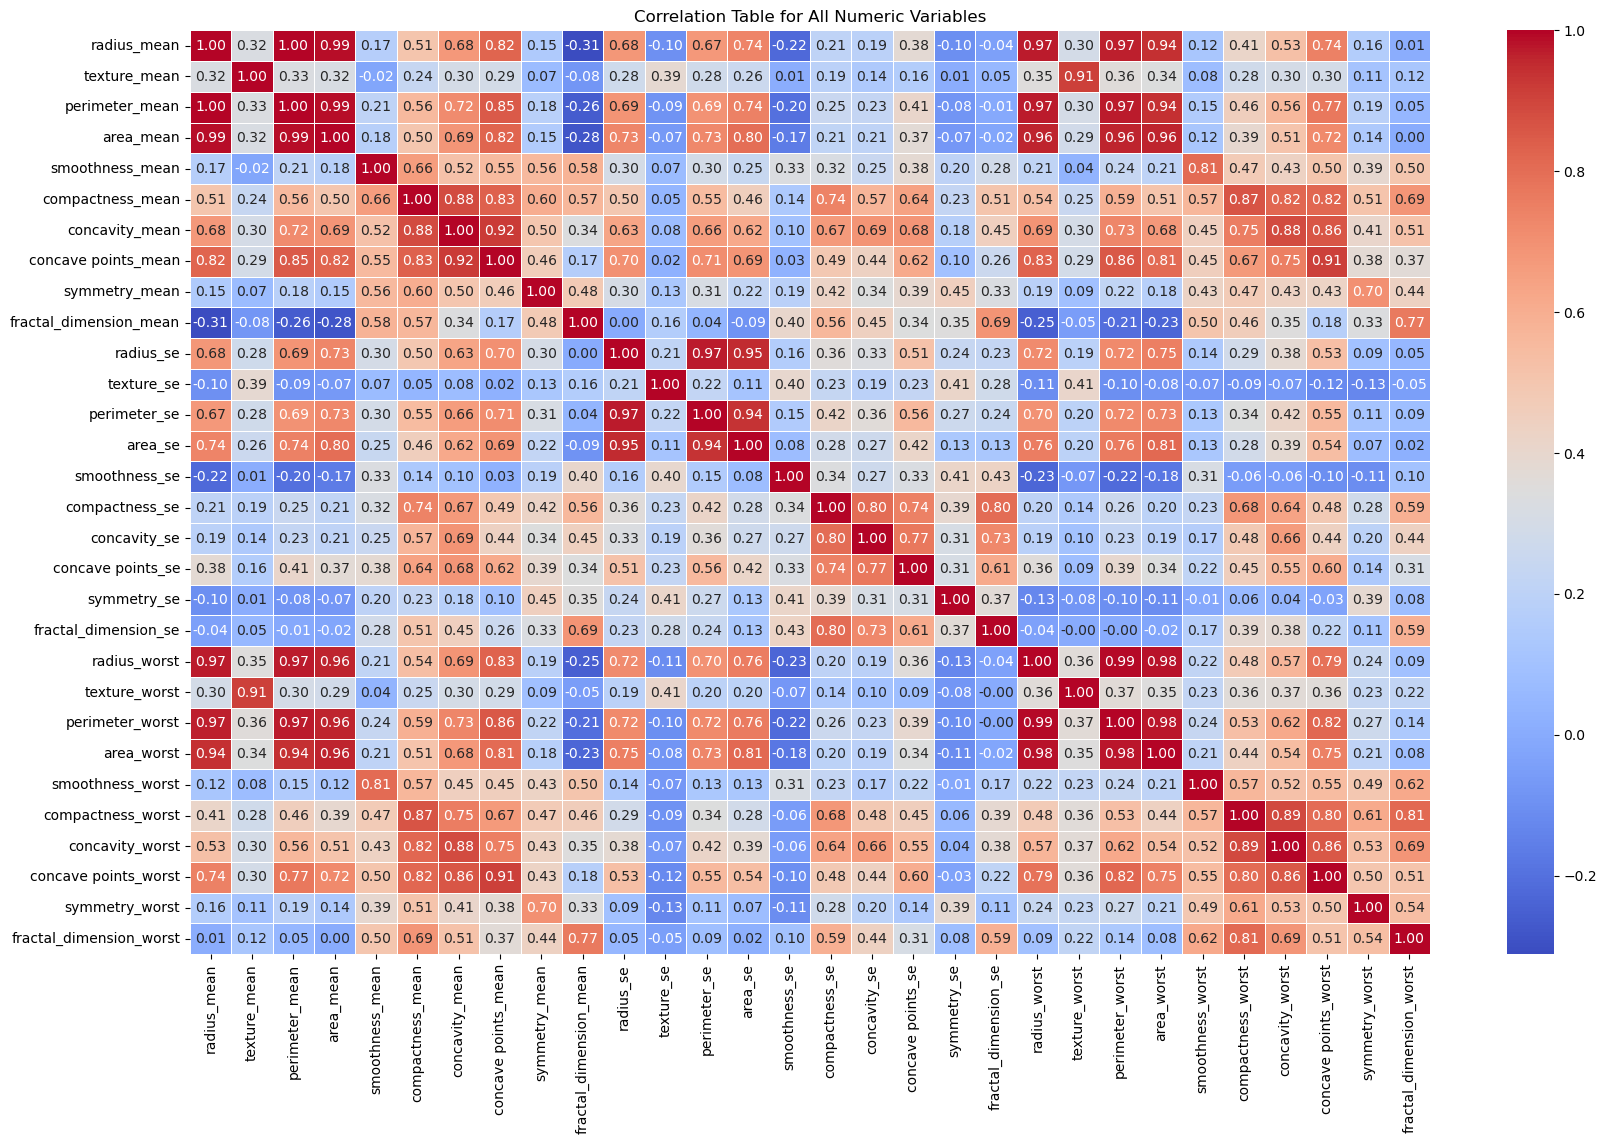

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Plot correlation table for all the number variables
plt.figure(figsize=(20, 12))
sns.heatmap(data.drop(columns=['id','diagnosis']).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Table for All Numeric Variables')
plt.show()





using threshold as abs .8 for all the columns the columns have been dropped and using seaborn plot the pre and post droppping of columns has been plotted

In [9]:
# 2. Create a list of variables that produce multicollinearity and drop them
# We can drop variables with correlation coefficient greater than 0.8
multicollinear_variables = []
correlation_matrix = data.drop(columns=['id','diagnosis']).corr().abs()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > 0.8:
            variable_name = correlation_matrix.columns[i]
            multicollinear_variables.append(variable_name)
data_dropped = data.drop(columns=multicollinear_variables)
print("Mutlicollinearity variables dropped")
print (multicollinear_variables)


Mutlicollinearity variables dropped
['perimeter_mean', 'area_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'concave points_mean', 'concave points_mean', 'concave points_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'area_se', 'area_se', 'concavity_se', 'fractal_dimension_se', 'radius_worst', 'radius_worst', 'radius_worst', 'radius_worst', 'texture_worst', 'perimeter_worst', 'perimeter_worst', 'perimeter_worst', 'perimeter_worst', 'perimeter_worst', 'area_worst', 'area_worst', 'area_worst', 'area_worst', 'area_worst', 'area_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concavity_worst', 'concavity_worst', 'concave points_worst', 'concave points_worst', 'concave points_worst', 'concave points_worst', 'concave points_worst', 'concave points_worst', 'fractal_dimension_worst']


plotting confusion matrix after being dropped

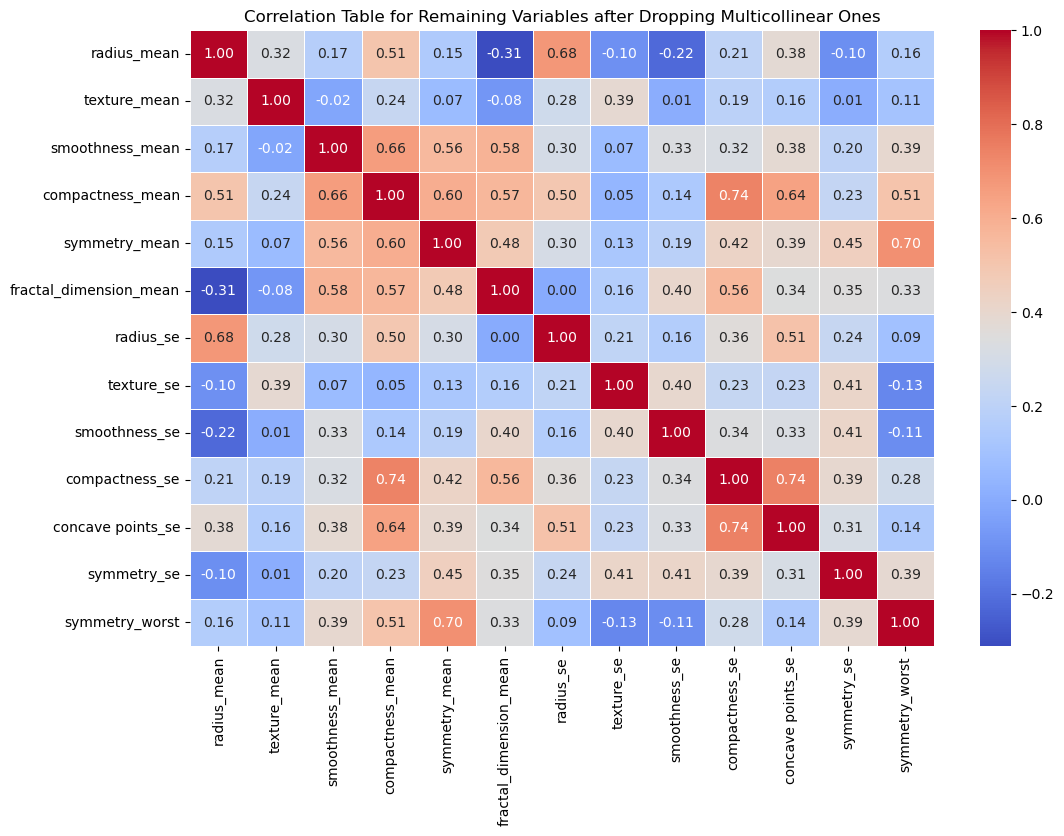

In [10]:
# 3. Plot correlation table for the new set of variables
plt.figure(figsize=(12, 8))
sns.heatmap(data_dropped.drop(columns=['id', 'diagnosis']).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Table for Remaining Variables after Dropping Multicollinear Ones')
plt.show()
# 4. Drop the columns for test data as well
X_train_dropped = X_train.drop(columns=multicollinear_variables)
X_test_dropped = X_test.drop(columns=multicollinear_variables)



### Task 1D:
Scale training and testing data using StandardScaler method.

Tip: only transform the testing data.

normalizing the features using standard scaler from sklearn

In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_dropped)

# Transform the testing data using the fitted scaler from training data
X_test_scaled = scaler.transform(X_test_dropped)


In [9]:
print("Shape of scaled training data:", X_train_scaled.shape)
print("Shape of scaled testing data:", X_test_scaled.shape)

Shape of scaled training data: (455, 21)
Shape of scaled testing data: (114, 21)


### Task 1E:

Finally!
1. Define Logistic Regression.
2. Use Repeated stratified K Fold method with 5 splits, 3 repeats and roc_auc scoring.
3. Print the mean of roc_auc scores.
4. Fit the Training data

 1. Define Logistic Regression:

 Logistic Regression is a statistical method used for predicting the probability of a binary outcome based on one or more predictor variables.
 It models the relationship between a binary dependent variable and one or more independent variables using the logistic function.


 * implemented stratifiedkfold on dataset to get better generalization of mode and used cross_val_score method to get the best scores

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score



# 2. Use Repeated stratified K Fold method with 5 splits, 3 repeats and roc_auc scoring
# Initialize Repeated Stratified K Fold with desired parameters
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression()

# Perform cross-validation using Repeated Stratified K Fold with roc_auc scoring
roc_auc_scores = cross_val_score(model, X_train_scaled, y_train, cv=rskf, scoring='roc_auc')

# 3. Print the mean of roc_auc scores
print("Mean ROC AUC Score:", roc_auc_scores.mean())

# 4. Fit the Training data
# Fit the Logistic Regression model on the training data
model.fit(X_train_scaled, y_train)


Mean ROC AUC Score: 0.9942896456828346


LogisticRegression()

### Task 1F:

1. Predict y test probability values from model.
2. Plot the precision -recall curve.
2. Obtain the best threshold value using precision_recall curve method and print them along with the f score.
3. Using best threshold, classify the y test probability.
5. Print the Final recall score and print th2 confusion matrix.

Note: y test probablity values are for the event(ie 1, Malignant)

plotting the precision vs recall values using matplotlib helping to find the best threshold 

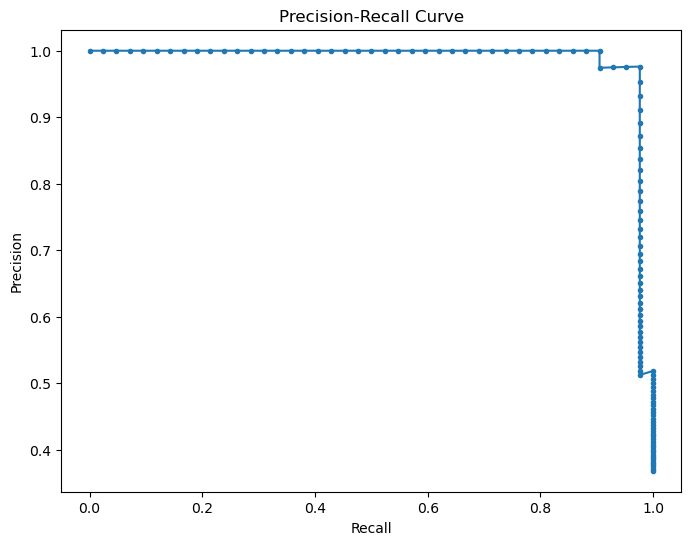

Best Threshold: 0.47740591128684007
F1 Score: 0.9761904761904762
Final Recall Score: 0.9761904761904762
Confusion Matrix:
[[71  1]
 [ 1 41]]


In [11]:
from sklearn.metrics import precision_recall_curve, confusion_matrix, f1_score, recall_score
import matplotlib.pyplot as plt

# 1. Predict y test probability values from model
y_test_prob = model.predict_proba(X_test_scaled)[:, 1]

# 2. Plot the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# 3. Obtain the best threshold value using precision_recall curve method and print them along with the f score
fscores = (2 * precision * recall) / (precision + recall)
best_threshold = thresholds[fscores.argmax()]
print("Best Threshold:", best_threshold)
print("F1 Score:", fscores.max())

# 4. Using best threshold, classify the y test probability
y_test_pred = (y_test_prob >= best_threshold).astype(int)

# 5. Print the Final recall score and print the confusion matrix
final_recall = recall_score(y_test, y_test_pred)
print("Final Recall Score:", final_recall)
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)


### Task 1G:

1. Apply SVM model with linear, rbf and poly kernel.
2. Print accuracy and recall score for all kernels.
3. Comment your interpretations for all the models applied on the data.

*Training three SVM kernels and displaying their respective accuracy & recall score*

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize SVM models with different kernels
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
svm_poly = SVC(kernel='poly')

# Fit SVM models on training data
svm_linear.fit(X_train_scaled, y_train)
svm_rbf.fit(X_train_scaled, y_train)
svm_poly.fit(X_train_scaled, y_train)

# Predict on testing data
svm_linear_pred = svm_linear.predict(X_test_scaled)
svm_rbf_pred = svm_rbf.predict(X_test_scaled)
svm_poly_pred = svm_poly.predict(X_test_scaled)

# Calculate accuracy and recall scores for all kernels
svm_linear_accuracy = accuracy_score(y_test, svm_linear_pred)
svm_linear_recall = recall_score(y_test, svm_linear_pred)
svm_rbf_accuracy = accuracy_score(y_test, svm_rbf_pred)
svm_rbf_recall = recall_score(y_test, svm_rbf_pred)
svm_poly_accuracy = accuracy_score(y_test, svm_poly_pred)
svm_poly_recall = recall_score(y_test, svm_poly_pred)

# Print accuracy and recall scores for all kernels
print("SVM with Linear Kernel:")
print("  Accuracy:", svm_linear_accuracy)
print("  Recall Score:", svm_linear_recall)

print("\nSVM with RBF Kernel:")
print("  Accuracy:", svm_rbf_accuracy)
print("  Recall Score:", svm_rbf_recall)

print("\nSVM with Polynomial Kernel:")
print("  Accuracy:", svm_poly_accuracy)
print("  Recall Score:", svm_poly_recall)


SVM with Linear Kernel:
  Accuracy: 0.9824561403508771
  Recall Score: 0.9761904761904762

SVM with RBF Kernel:
  Accuracy: 0.9912280701754386
  Recall Score: 0.9761904761904762

SVM with Polynomial Kernel:
  Accuracy: 0.8771929824561403
  Recall Score: 0.6666666666666666


**Interpretations**

**Best Threshold:**<Br>
The identified optimal threshold of about 0.4774 means that is a balanced for trade-off between sensitivity and specificity. 

**F1 Score and Final Recall:**<Br>
Both being of high scores at 97%, shows that the model achieves a balance between precision and recall. 

**Mean ROC AUC Score:**<Br>
A score of approximately 99% represents outstanding model performance, showcasing a high capability to differentiate between class labels. This high score indicates that the model is effective in classifying instances with a significant degree of certainty across various thresholds.

**SVM with Linear Kernel:** <Br>
The model shows high accuracy at 98%, classifies properly. recall score of 97% suggests makes it reliable.

**SVM with RBF Kernel:**<Br>
This model is better than linear kernel with an accuracy of 99%, helps in handling of non-linear relationships. The consistent recall score with the linear kernel implies it is effective for  true positives.

**SVM with Polynomial Kernel:**<Br>
There is drop in performance with an accuracy of 87% and recall at 66%, where the polynomial kernel might not align well with this data. Hence, this model is not suitable for the dataset.

## Task 2: NLP on  Movie Review Data

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
movie_data = pd.read_csv("movie_review.csv")

movie_data.head()

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos


### Task 2A:

1. Map the 'tag' variable to 1-Pos and 0-neg.
2. Display a pie chart for the distribution of two categories of reviews.
3. The pie chart should have title, the name and percentage of each category and startangle equal to 90.
4. Use explode feature for Positive category.

*plotting pie chart using seaborn library and mapping the tag column (pos -> 1, neg ->0)*

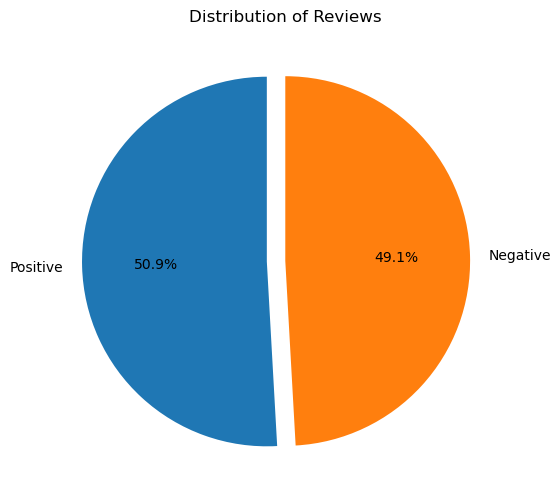

In [14]:
movie_data['tag'] = movie_data['tag'].map({'pos': 1, 'neg': 0})

# Get counts of positive and negative reviews
counts = movie_data['tag'].value_counts()

plt.figure(figsize=(8, 6))
labels = ['Positive', 'Negative']
explode = (0.1, 0)


plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Distribution of Reviews')
plt.show()

### Task 2B:
Now its time to clean the text to keep as many as useful words for further processing.


1. Remove special caharacters from the text.
2. Remove stop words.
3. Lemmatize the words.
4. Keep only text that is alphabet and the length of the word is greater than 2.

Note: Remember to lower the text before applying these cleaning techniques.

*downloading stopwords  dataset using natural language toolkit *

In [15]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mirmustafaali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

*using regular expression and nltk wordnet lemmatizer to perform lemmatization and to only pertain numericals and alphabets, which provided clean dataset*

In [16]:
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
# Initialize WordNet lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define a function to perform text cleaning and lemmatization
def clean_and_lemmatize(text):
    # Lowercase the text
    text = text.lower()

    # Remove special characters using regular expression
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize the text into words
    words = text.split()

    # Lemmatize the words and remove stop words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and len(word) > 2 and word.isalpha()]

    # Return cleaned and lemmatized text
    return ' '.join(lemmatized_words)

# Apply the clean_and_lemmatize function to the 'text' column
movie_data['cleaned_text'] = movie_data['text'].apply(clean_and_lemmatize)

# Display cleaned and lemmatized text
print(movie_data['cleaned_text'])



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mirmustafaali/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0        film adapted comic book plenty success whether...
1        starter created alan moore eddie campbell brou...
2        say moore campbell thoroughly researched subje...
3        book graphic novel page long includes nearly c...
4                            word dont dismiss film source
                               ...                        
64715       lack inspiration traced back insipid character
64716    like many skit current incarnation saturdaynig...
64717    watching one roxbury skit snl come away charac...
64718                        bump unsuspecting woman thats
64719       watching anightattheroxbury youll left exactly
Name: cleaned_text, Length: 64720, dtype: object


### Task 2C:

1. Split the data into training/testing with 80-20 ration and stratify
2. Also define startified kfold with 3 splits.

*initializing the stratifiedkfold class to have k fold with 3 splits*

In [17]:
from sklearn.model_selection import train_test_split, StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(movie_data['cleaned_text'], movie_data['tag'], test_size=0.2, stratify=movie_data['tag'], random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

# Define Stratified KFold with 3 splits
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Display the indices for each fold
for train_index, test_index in skf.split(X_train, y_train):
    print("Train indices:", train_index)
    print("Test indices:", test_index)

Training set shape: (51776,) (51776,)
Testing set shape: (12944,) (12944,)
Train indices: [    0     2     4 ... 51773 51774 51775]
Test indices: [    1     3     5 ... 51764 51770 51771]
Train indices: [    0     1     2 ... 51772 51774 51775]
Test indices: [    4     7     8 ... 51767 51768 51773]
Train indices: [    1     3     4 ... 51770 51771 51773]
Test indices: [    0     2     6 ... 51772 51774 51775]


### Task 2D:

1. Use Bag of words technique with bigrams and apply to trainign and testing data.
2. Use TF-IDF technique with bigrams and apply to training and testing data.

TIP: Remember to store the modified data into different variables.
Note: Remember to only transform the testing data.

*implementing count vectorizer and tf-idf vectorizer on dataset to train models on different preprocessing steps*

In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# 1. Bag of Words with bigrams
# Initialize CountVectorizer with bigrams
count_vectorizer = CountVectorizer(ngram_range=(1, 2))

# Fit and transform the training data
X_train_bow = count_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_bow = count_vectorizer.transform(X_test)

# 2. TF-IDF with bigrams
# Initialize TfidfVectorizer with bigrams
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display the shapes of the transformed data
print("Bag of Words (Bigrams) - Training set shape:", X_train_bow.shape)
print("Bag of Words (Bigrams) - Testing set shape:", X_test_bow.shape)
print("TF-IDF (Bigrams) - Training set shape:", X_train_tfidf.shape)
print("TF-IDF (Bigrams) - Testing set shape:", X_test_tfidf.shape)


Bag of Words (Bigrams) - Training set shape: (51776, 416588)
Bag of Words (Bigrams) - Testing set shape: (12944, 416588)
TF-IDF (Bigrams) - Training set shape: (51776, 416588)
TF-IDF (Bigrams) - Testing set shape: (12944, 416588)


### Task 2E:
Now comes the main part where we will be applying machine learning algorithms on the cleaned, transformed data.

1. Apply Multinomial Naive Bayes and Logistic Regression for both bag of words and TF-IDF transformed data.
2. Use Roc-Auc and accuracy evaluation metric
3. Display the scores in a tabular format.
4. Perform hyper-parameter tuning for each algorithm with grid search and use the best estimated model from each type to test the data further.
5. Display the confusion matrix.

Note: Look at the model performance while selecting the bag of words and TFIDF technique for each algorithm.

*using gridsearch cross validation to trai models to attain the best model based on roc & auc score, accuracy score metrics and displaying confusion matrix and storing the values in the dataframe for easier access* 

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
import pandas as pd


# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    return roc_auc, accuracy, y_pred

# Function for hyperparameter tuning
def perform_grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=3)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

# Main function for running the analysis
def run_analysis(y_train, y_test, models, param_grids, techniques):
    results = []
    for technique in techniques:
        X_t_train, X_t_test = techniques[technique]
        for algorithm_name, model in models.items():
            param_grid = param_grids[algorithm_name]
            best_model, best_params = perform_grid_search(model, param_grid, X_t_train, y_train)
            roc_auc, accuracy, y_pred = evaluate_model(best_model, X_t_train, y_train, X_t_test, y_test)
            results.append({
                "Technique": technique,
                "Algorithm": algorithm_name,
                "ROC-AUC": roc_auc,
                "Accuracy": accuracy,
                "Best Parameters": best_params,
                "Confusion Matrix": confusion_matrix(y_test, y_pred)
            })
    return results

# Define your data and models here
param_grids = {
    'Multinomial Naive Bayes': {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]},
    'Logistic Regression': {'C': [0.1, 0.5, 1.0, 2.0, 5.0]}
}

models = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

techniques = {
    'Bag of Words': (X_train_bow, X_test_bow),
    'TF-IDF': (X_train_tfidf, X_test_tfidf)
}

# Assume X_train_bow, X_test_bow, X_train_tfidf, X_test_tfidf, y_train, and y_test are defined elsewhere
results = run_analysis(y_train, y_test, models, param_grids, techniques)
results_df = pd.DataFrame(results)
results_df

,Technique,Algorithm,ROC-AUC,Accuracy,Best Parameters,Confusion Matrix
0,Bag of Words,Multinomial Naive Bayes,0.788526,0.706582,{'alpha': 2.0},"[[4003, 2354], [1444, 5143]]"
1,Bag of Words,Logistic Regression,0.770105,0.700788,{'C': 0.5},"[[4477, 1880], [1993, 4594]]"
2,TF-IDF,Multinomial Naive Bayes,0.788917,0.709363,{'alpha': 0.5},"[[4107, 2250], [1512, 5075]]"
3,TF-IDF,Logistic Regression,0.771369,0.701638,{'C': 5.0},"[[4241, 2116], [1746, 4841]]"


*plotting confusion matrix for the matrix in subplot format*

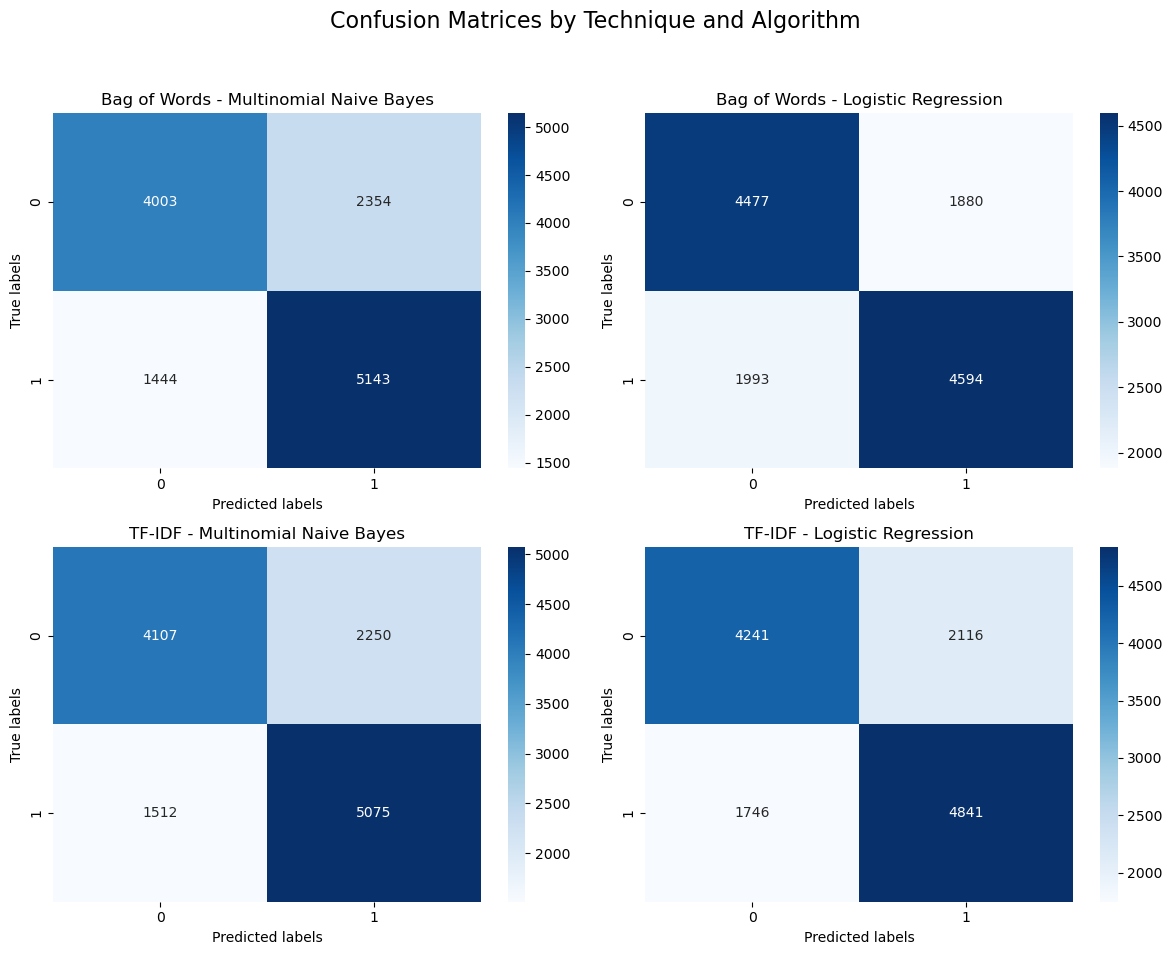

In [20]:
import seaborn as sns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Confusion Matrices by Technique and Algorithm', fontsize=16)

for i, (index, row) in enumerate(results_df.iterrows()):

    ax = axes[i//2, i%2]
    sns.heatmap(row['Confusion Matrix'], annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"{row['Technique']} - {row['Algorithm']}")
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

### Task 2F:
1. Display a bar chart for the accuracy scores for each model.
2. Display the percentages on the bar.
3. Apply opacity on the bars according to the scores(1 being highest).
4. Display proper title and axes names.
5. IMP: Interpret your results and conclusion.

*applying bar graph to the accuracy and applying opacity to the bars according to the score because the difference is less it is difficult to differentiate it using naked eye*

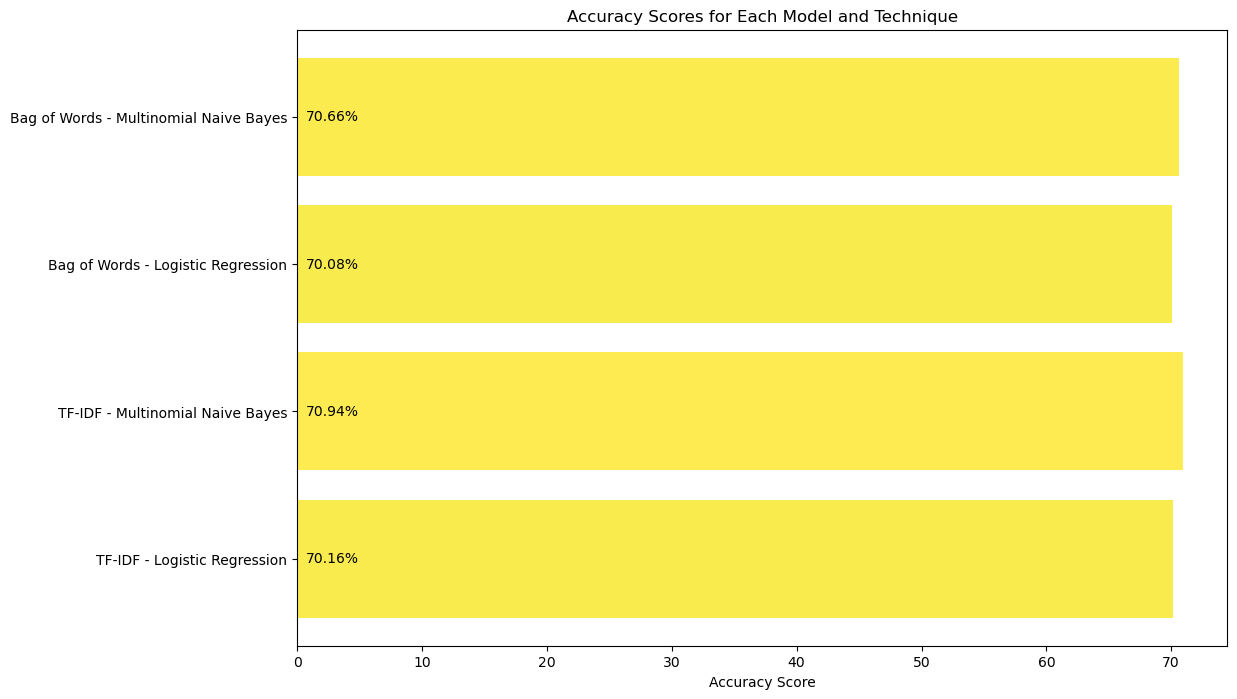

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Define colors and opacity based on scores
opacity = results_df['Accuracy'] / results_df['Accuracy'].max()
colors = plt.cm.viridis(opacity)

# Plot bar chart
plt.figure(figsize=(12, 8))
plt.barh(np.arange(len(results_df)), results_df['Accuracy'] * 100 , color=colors, alpha=0.8)
plt.yticks(np.arange(len(results_df)), results_df['Technique'] + " - " + results_df['Algorithm'])
plt.xlabel('Accuracy Score')
plt.title('Accuracy Scores for Each Model and Technique')
plt.gca().invert_yaxis()

# Add percentages on the bars
for i, accuracy in enumerate(results_df['Accuracy']):
    plt.text(accuracy, i, f'{(accuracy * 100):.2f}%', va='center')

plt.show()


**Interpretation:** <br>
<br>
The provided results dataframe compares the performance of different text classification techniques and algorithms on a dataset, specifically focusing on the Bag of Words (BoW) and TF-IDF (Term Frequency-Inverse Document Frequency) techniques combined with Multinomial Naive Bayes and Logistic Regression algorithms.

*ROC-AUC (Receiver Operating Characteristic - Area Under Curve):*

The ROC-AUC scores are quite similar across all technique-algorithm combinations, ranging from ~0.77 to ~0.79. This suggests that all models are relatively comparable between the positive and negative classes. The highest ROC-AUC is observed with TF-IDF combined with Multinomial Naive Bayes (0.788917).

*Accuracy*:

The optimal smoothing parameter (alpha) is higher for Bag of Words compared to TF-IDF , indicating more significant smoothing is necessary with BoW. In Logistic Regression, lower regularization strength (C = 0.5) suits BoW, showcases overfitting concerns, while TF-IDF performs better with a higher value (C = 5.0). This variation in parameters between techniques suggests differing needs for model complexity and feature smoothing.

*Confusion Matrix*:

The BoW approach with Multinomial Naive Bayes shows more false positives than the TF-IDF method, indicates overfitting but TF-IDF paired with Multinomial Naive Bayes delivers superior ROC-AUC and accuracy, indicate that its effective for feature representation and classification of this particular dataset.